<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (latitude, longitude) float32 0.1899 0.1899 ... -0.002595
    v10        (latitude, longitude) float32 0.08568 0.08568 ... -0.008725
    sp         (latitude, longitude) float32 1.024e+05 1.024e+05 ... 6.906e+04


AttributeError: 'Variable' object has no attribute 'plot'

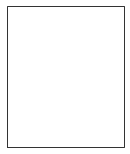

In [10]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :
# 
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, GeoBounds, get_cartopy, cartopy_xlim
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

scheme_name=["(a) Era 5 Idai","(b) Era 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]
###ERA 5
# https://fabienmaussion.info/climate_system/week_04/01_Lesson_Wind-Derivatives-Integrals.html
# https://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week8/05_Xarray_TimeSeries.html?highlight=slp
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\Era_wrf_data\Kenneth" Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data='/mnt/g/WRF_Schemes/Era_wrf_data/Era/'   #IAP
#"G:\WRF_Schemes\Era_wrf_data\Era\UV10_mslp_01.nc"
#
#fig=plt.figure(figsize=(18,15),constrained_layout=True)#, dpi=200)
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig.subplots_adjust(wspace=.35)
#fig.tight_layout()
for imonth in np.arange(1,3):  # loop over 2 events 
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fic=rep_data+'eUV10_mslp_'+'{:02d}'.format(imonth)+'.nc'
    ds=xr.open_dataset(fic)
    #ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
    many_times=np.array(['2019-03-15T00:00:00','2019-04-25T15:00:00'],dtype=np.datetime64)
    ds =ds.sel(time=many_times, method='nearest').mean('time')
    print(ds)
    #Read variables
    sp=ds.variables['sp'][:].squeeze()
    u10=ds.variables['u10'][:].squeeze()
    v10=ds.variables['v10'][:].squeeze()
    lon=ds.variables['longitude'][:].squeeze()
    lat=ds.variables['latitude'][:].squeeze()
    
    # Convert kilopascal to hPa 
    sp = ds.sp/100
    #ax.set_extent([-10.,40.1,30,60],ccrs.PlateCarree())
    
    
    u = ds.u10.sel(month=1).load()
    v = ds.v10.sel(month=1).load()
    Quiver plots
    One traditional way to plot the wind data is as vector arrows. We can use a function called quiver() for that:

    ax = plt.axes(projection=ccrs.PlateCarree())  # note that I changed the map projection
    pu, pv = u[::9,::9], v[::9,::9]  # we will discuss what this line does in the cells below
    qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
    ax.coastlines(color='grey');
    
    
    
    
    
    
    # Wind Speed 
    ws = (u10**2 + v10**2)**0.5
    
    msl=ws.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=get_cmap("jet"), extend="max",add_colorbar=False) 
    
    #msl=sp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=get_cmap("jet"), extend="max",add_colorbar=False) 
    #wnspc=plt.contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(mslp), 10, 
    #                transform=ccrs.PlateCarree(), cmap=get_cmap("rainbow"))
    #plt.clabel(msl, inline=1, fontsize=10, fmt="%i")

    
    ###########
    gl=ax.gridlines(color="black", linestyle="dotted",draw_labels=True)
    #plt.colorbar(strm.lines)
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    #ax.coastlines(color='grey')#; gl1=ax.gridlines(draw_labels=True);  # what is this line doing?
    #ax.gridlines(draw_labels=True);  # what is this line doing?
    ax.coastlines(color='black', linewidth=0.8);gl.top_labels = gl.right_labels = False
    
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    plt.title(scheme_name[imonth-1],fontsize=10)





#save figures    
rep_data1='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Plots/' 
year='2019'
#plt.tight_layout(pad=4.5, h_pad=1.0, w_pad=1.0)        # To adjust spacing between subplots and inside the figure
plt.savefig(rep_data1+'lowerMslpx_'+year+'.png', bbox_inches='tight',dpi=200) #'monmean_SRF.'+year+month+'.
plt.savefig(rep_data1+'lowerMslpx_'+year+'.pdf', bbox_inches='tight',dpi=200)
plt.show() 
    

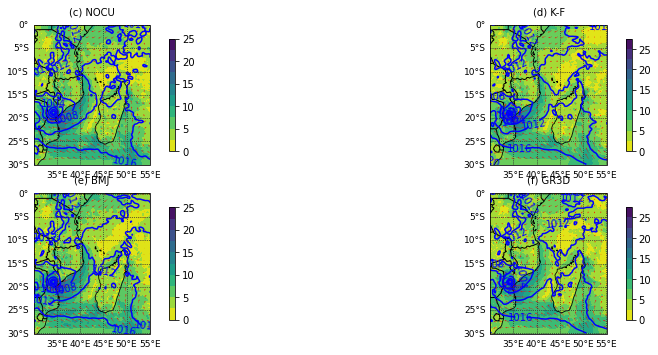

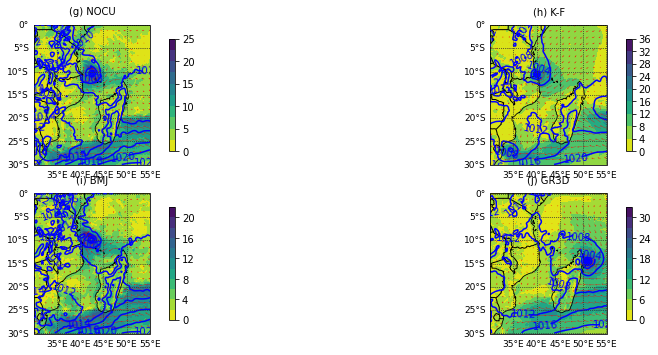

In [9]:
#!/usr/bin/env python
# coding: utf-8
#https://pratiman-91.github.io/2020/07/29/WRF-Surface-plot-using-Python.html
# Import the tools needed :
# 
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, GeoBounds, get_cartopy, cartopy_xlim
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :

from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker




scheme_name=["(a) Era 5 Idai","(b) Era 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]


####Idai
##############################Kenneth      
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Idai/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data= '/mnt/g/WRF_Schemes/Era_wrf_data/Kenneth/' #IAP
#"G:\WRF_Schemes\Era_wrf_data\Idai\wrfout_d01_03.nc"
#fig3=plt.figure(figsize=(18,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig3.subplots_adjust(hspace=0.3, wspace=.0005)
#fig.tight_layout()
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
for imonth in np.arange(3,7):  # loop over 12 months
    #fig=plt.figure(figsize=(12,10))
    #ax1.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    #fig3=plt.figure(figsize=(18,15))#,
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fnc=rep_data+'wrfout_d01_'+'{:02d}'.format(imonth)+'.nc'
    ncfile=Dataset(fnc) #          
    
    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    #slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    #smooth_slp = smooth2d(slp, 5)



    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_slp = smooth2d(slp, 3)

    #get wind speed and components
    wspd = getvar(ncfile, "uvmet10_wspd_wdir", units="m s-1", timeidx=37, method="cat")[0,:]
    #wspd = wspd[time_slice_1]

    u10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[0,:]
    #u10 = u10[time_slice_1]

    v10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[1,:]
    #v10 = v10[time_slice_1]


    # Get the latitude and longitude points
    lats, lons = wrf.latlon_coords(slp)
    # Get the cartopy mapping object
    cart_proj = get_cartopy(slp)
    # Create a figure
    #fig = plt.figure(figsize=(15,12))
    # Set the GeoAxes to the projection used by WRF
    #ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    #states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
    #                             name='admin_1_states_provinces_shp')
    #ax.add_feature(states, linewidth=.5)

    #ax.coastlines(color='black');# 


    #ax.coastlines('50m', linewidth=0.8)

    # Make the contour outlines for the smoothed sea level pressure.
    contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="blue",
                transform=crs.PlateCarree())
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
    # Add the wind speed contours
    plt.contourf(to_np(lons), to_np(lats), to_np(wspd), 10, transform=crs.PlateCarree(),cmap='viridis_r')
                 #cmap=get_cmap("rainbow"))

    # Add a color bar
    plt.colorbar(ax=ax, shrink=.8)

    #Add wind barbs, only plotting every 15th data point.
    #barbNo=6
    #ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
    #         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

    #Add wind vectors
    quiverNo=6
    ax.quiver(to_np(lons[::quiverNo,::quiverNo]), to_np(lats[::quiverNo,::quiverNo]),
             to_np(u10[::quiverNo,::quiverNo]),to_np(v10[::quiverNo,::quiverNo]), 
             transform=crs.PlateCarree(),headwidth=4,color='r',regrid_shape=20) 



    # Set the map limits
    #ax.set_xlim(cartopy_xlim(smooth_slp)) #########################################xxxxxxxx
    #ax.set_ylim(cartopy_ylim(smooth_slp))
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 



    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)


##############################Kenneth      
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Kenneth/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data= '/mnt/g/WRF_Schemes/Era_wrf_data/Kenneth/' #IAP
#"G:\WRF_Schemes\Era_wrf_data\Idai\wrfout_d01_03.nc"
#fig3=plt.figure(figsize=(18,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig3.subplots_adjust(hspace=0.3, wspace=.0005)
#fig.tight_layout()
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
for imonth in np.arange(7,11):  # loop over 12 months
    #fig=plt.figure(figsize=(12,10))
    #ax1.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    #fig3=plt.figure(figsize=(18,15))#,
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fnc=rep_data+'wrfout_d01_'+'{:02d}'.format(imonth)+'.nc'
    ncfile=Dataset(fnc) #          
    
    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    #slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    #smooth_slp = smooth2d(slp, 5)



    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_slp = smooth2d(slp, 3)

    #get wind speed and components
    wspd = getvar(ncfile, "uvmet10_wspd_wdir", units="m s-1", timeidx=37, method="cat")[0,:]
    #wspd = wspd[time_slice_1]

    u10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[0,:]
    #u10 = u10[time_slice_1]

    v10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[1,:]
    #v10 = v10[time_slice_1]


    # Get the latitude and longitude points
    lats, lons = wrf.latlon_coords(slp)
    # Get the cartopy mapping object
    cart_proj = get_cartopy(slp)
    # Create a figure
    #fig = plt.figure(figsize=(15,12))
    # Set the GeoAxes to the projection used by WRF
    #ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    #states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
    #                             name='admin_1_states_provinces_shp')
    #ax.add_feature(states, linewidth=.5)

    #ax.coastlines(color='black');# 


    #ax.coastlines('50m', linewidth=0.8)

    # Make the contour outlines for the smoothed sea level pressure.
    contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="blue",
                transform=crs.PlateCarree())
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
    # Add the wind speed contours
    plt.contourf(to_np(lons), to_np(lats), to_np(wspd), 10, transform=crs.PlateCarree(),cmap='viridis_r')
                 #cmap=get_cmap("rainbow"))

    # Add a color bar
    plt.colorbar(ax=ax, shrink=.8)

    #Add wind barbs, only plotting every 15th data point.
    #barbNo=6
    #ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
    #         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

    #Add wind vectors
    quiverNo=6
    ax.quiver(to_np(lons[::quiverNo,::quiverNo]), to_np(lats[::quiverNo,::quiverNo]),
             to_np(u10[::quiverNo,::quiverNo]),to_np(v10[::quiverNo,::quiverNo]), 
             transform=crs.PlateCarree(),headwidth=4,color='r',regrid_shape=20) 



    # Set the map limits
    #ax.set_xlim(cartopy_xlim(smooth_slp)) #########################################xxxxxxxx
    #ax.set_ylim(cartopy_ylim(smooth_slp))
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 



    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)

    #save figures    
rep_data1='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Plots/' 
year='2019'
#plt.tight_layout(pad=4.5, h_pad=1.0, w_pad=1.0)        # To adjust spacing between subplots and inside the figure
plt.savefig(rep_data1+'mslp_v'+year+'.png', bbox_inches='tight',dpi=200) #'monmean_SRF.'+year+month+'.
plt.savefig(rep_data1+'mslp_v'+year+'.pdf', bbox_inches='tight',dpi=200)
plt.show() 
    
